# Internet Ads Logistic Regression Project

## Table of Contents 
1. Introduction
2. Preparing the Data
3. Cleaning the Data
4. Exploratory Data
5. Analyzing the Data
6. Results
7. Conclusion

## Introduction

Have you ever wondered about the specific factors of what affects someone to click on an ad?

This project analyzes data from a data set that contains ad data from around the world.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question:

How accurate and effective can these variables predict whether or not someone clicked on an ad?

## Preparing the Data

In [23]:
# Importing the necessary packages; we will be using LogisticRegression from sklearn.linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score

## Cleaning the Data

In [24]:
# Creating the dataframe with our csv file
df = pd.read_csv('advertising.csv')
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [25]:
# Lets check our dataframe with the function info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [26]:
# After inspecting the dataframe, there are no null values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [27]:
# Lets convert the names of the columns to make it easier
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [28]:
# The timestamp gives us the exact time but we want to extract the hours from the object
def convert_to_hours(df, column_name):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['time_of_day'] = df['timestamp'].dt.hour + (df['timestamp'].dt.minute/60) + (df['timestamp'].dt.second/3600)
    return df
df = convert_to_hours(df, 'timestamp')

In [29]:
df

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad,time_of_day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0.886389
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1.650556
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20.595000
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2.521944
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3.605000
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21.816667
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2.116944
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17.415833
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2.598333


In [30]:
# Creating a condition in order to divide the times by morning, afternoon, and night
conditions = [(df.time_of_day < 12),
              (df.time_of_day < 18),
              (df.time_of_day < 24)]

choices = ['morning',
           'afternoon',
           'evening']

df['time_of_day'] = np.select(conditions, choices, default='night')

In [31]:
# Creating a dummy variable in seperate the columns into binary values
df_dummies = pd.get_dummies(df['time_of_day'])
df = pd.concat([df, df_dummies], axis=1)
df

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad,time_of_day,afternoon,evening,morning
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,morning,0,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,morning,0,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,evening,0,1,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,morning,0,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,morning,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,evening,0,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,morning,0,0,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,afternoon,1,0,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,morning,0,0,1


## Exploratory Data

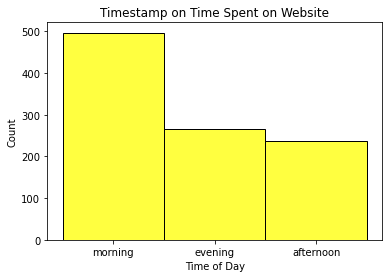

In [32]:
# Before removing our columns, lets visualize of individuals on the website in the morning, afternoon, or evening
sns.histplot(data = df, x = 'time_of_day', color = 'yellow')
plt.title('Timestamp on Time Spent on Website')
plt.xlabel('Time of Day')
plt.show()

We can observe that most people spent time on the website in the morning while the least during the afternoon.

In [33]:
# We no longer need the time of day and timestamp column
df.drop("time_of_day", axis = "columns", inplace = True)
df.drop("timestamp", axis = "columns", inplace = True)

In [34]:
# We change the male column to gender as 0: male, 1: female
df = df.rename(columns={'male': 'gender'})
df.describe()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,clicked_on_ad,afternoon,evening,morning
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,0.238000,0.265000,0.497000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,0.426072,0.441554,0.500241
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,0.000000,0.000000,0.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,0.000000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,1.000000,1.000000,1.000000


We can observe that the we have an almost even number of males and females in our dataset. Most people spent about around 65 minutes on the site while the daily internet usage was 180 minutes on ave

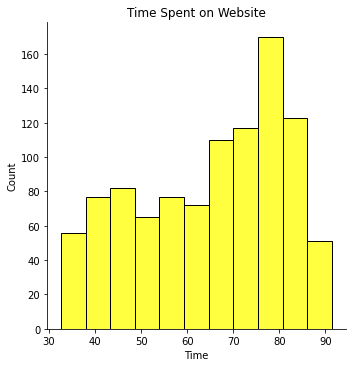

In [35]:
# We visualize how often people spent time on the website
sns.displot(data=df, x = df.daily_time_spent_on_site, kind="hist", color = 'yellow')
plt.title('Time Spent on Website')
plt.xlabel("Time")
plt.show()

Our left skewed distribution (negative skewness) represents how majority of the individuals spent around 80 ~ 85 minutes on the website.

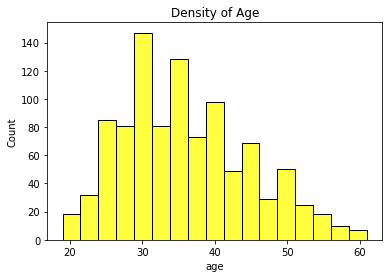

In [36]:
# Observing our the density of our age groups
sns.histplot(data = df, x = 'age', color = 'yellow')
plt.title('Density of Age')
plt.show()

The distribution is slightly right skewed (positive skewness) as we can observe that most people were in their mid 20's to late 30's.

## Analyzing the Data

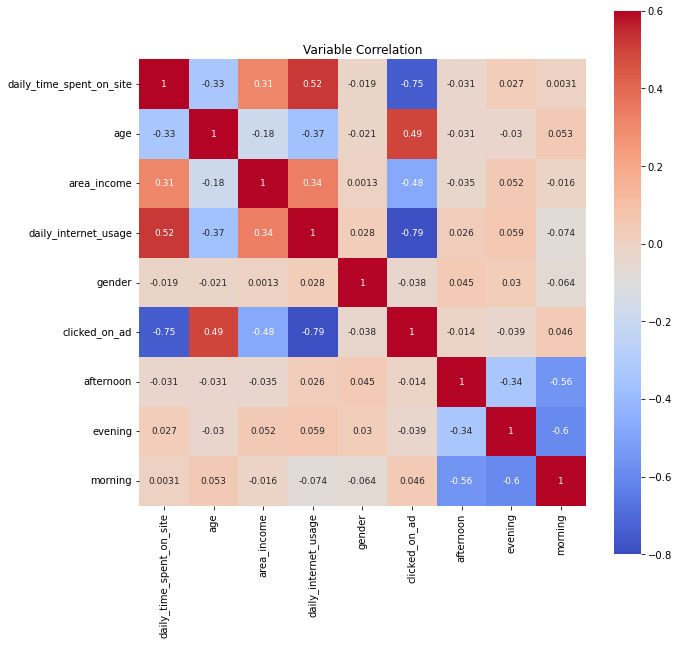

<Figure size 432x288 with 0 Axes>

In [37]:
# Creating a heat map of the correlation between variables
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9}, vmin=-.8, vmax=0.6)
plt.title('Variable Correlation')
plt.show()
plt.clf()

We can observe that the the variabes that strongly correlate with clicking on the ad are of age, while variables such as daily internet usage, daily time spent on site, and area income are not strongly correlated.

In [16]:
# We want to establish the independent and dependent variables
x = df[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'gender', 'morning', 'afternoon', 'evening']]
y = df[["clicked_on_ad"]]
y = df['clicked_on_ad'].values.reshape(-1)

In [17]:
# We set up our model to fit our training set and test our data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Results

In [18]:
model.score(x_test, y_test)

0.88

[[90  8]
 [16 86]]


Text(42.0, 0.5, 'Truth')

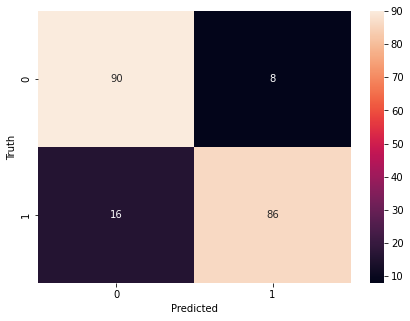

In [19]:
# Creating a confusion matrix in order to visualize how accurate the predictions are
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='.4g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
# Using the classification report to observe how accurate our model was
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        98
           1       0.91      0.84      0.88       102

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [39]:
# Creating a data table to better understand the correlation between the variables
coef_df = pd.DataFrame(zip(x_train.columns, model.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
coef_df

,var,coef
0,daily_time_spent_on_site,-0.064422
3,daily_internet_usage,-0.022760
2,area_income,-0.000013
7,evening,0.000241
6,afternoon,0.001202
4,gender,0.001821
5,morning,0.003718
1,age,0.254079


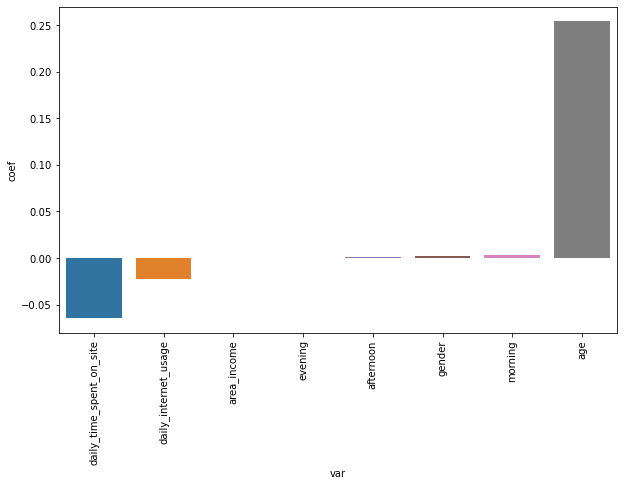

In [40]:
# Plotting a barplot can help us visualize this relationship more
plt.figure(figsize=(10,6))
sns.barplot(x = coef_df["var"], y = coef_df["coef"])
plt.xticks(rotation=90)
plt.show()

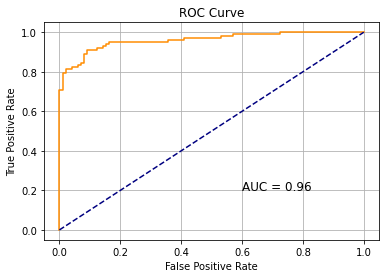

In [41]:
# Building a ROC Curve to illustrate the true positive and false positive rate
y_pred_prob = model.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')
plt.title('ROC Curve')

# Add AUC value on the graph
plt.text(x=0.6, y=0.2, s='AUC = {:.2f}'.format(roc_auc), fontsize=12)

plt.grid()
plt.show()

This yellwo curve (ROC Curve) displauys the true positive rate (TPR) against the false positive rate (TPR). Since our curve is well above the blue line ("random guessing line"), it is a good indicator that our model exceeded average performance during the test. The AUC (Area Under the Curve) is also an indicator of our performance where the value ranges from 0 to 1, with a higher value indicating a better performance model.

## Conclusion

The multiple logistic regression test model achieved a score of 0.88, indicating a strong performance. The confusion matrix also shows that the model correctly predicted 90 and 86 cases of the positive and negative class, respectively, while misclassifying 7 and 14 cases. This suggests that the model is able to accurately identify the majority of cases in both classes.

The coefficients of the variables in the model indicate that the daily time spent on site, daily internet usage, and area income have a negative relationship with the target variable. On the other hand, age and gender have a positive relationship with the target variable. The AUC value of 0.96 suggests that the model is able to distinguish between the positive and negative class with a high level of accuracy. Overall, this logistic regression model appears to be a useful tool for predicting the target variable which was to predict if an individual was going to click on an ad or not.